In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import re
from matplotlib import pyplot as plt
from matplotlib.ticker import LogLocator
from pprint import pprint
tool_dir = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/ESMF_profiling'
sys.path.append(tool_dir)
from esmf_related_functions import _read_ryaml, _expt_fullname, _extract_ntasks_values, _extract_restart_stop_values
from esmfFileParser import collect_runtime_tot

In [3]:
pics_folder = "esmf-profiling"
pics_folder = os.path.join(tool_dir, pics_folder)
os.makedirs(pics_folder, exist_ok=True)

In [4]:
expts_manager_path = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager'
yaml_input = os.path.join(expts_manager_path, 'Expts_manager-1deg-scaling_performance.yaml')
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
test_rel_path = yaml_input['test_path']
esmf_expt_dir1 = yaml_input['namelists']['cross_block1']['cross_block1_dirs']
esmf_expt_dirs = list(esmf_expt_dir1)
MOM_full_paths = [os.path.join(expts_manager_path, test_rel_path, esmf_expt_dir) for esmf_expt_dir in  esmf_expt_dirs]
xxx = '000'
ESMF_path = [f"{MOM_full_path}/archive/output{xxx}" for MOM_full_path in MOM_full_paths]
ncpus_list_combo1 = yaml_input['namelists']['cross_block1']['nuopc.runconfig']['PELAYOUT_attributes_combo']
expt_names1 = _expt_fullname(ncpus_list_combo1)
clock1_list_combo1 = yaml_input['namelists']['cross_block1']['nuopc.runconfig']['CLOCK_attributes_combo']
clock1 = _expt_fullname(clock1_list_combo1)
pprint(ESMF_path)
pprint(expt_names1)
pprint(clock1)

['/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_test0/pt_1_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_test0/pt_2_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_test0/pt_3_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_test0/pt_4_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_test0/pt_5_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_test0/pt_6_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_test0/pt_7_test/archive/output000',
 '/g/d

In [5]:
date_values = _extract_restart_stop_values(clock1)
date_values

[{'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'sto

[1, 3, 5, 7, 9, 11, 13]

In [7]:
regionNames = [
    '[ESMF]',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF] RunPhase1',

    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN-TO-MED] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE-TO-MED] RunPhase1',

    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM-TO-MED] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF-TO-MED] RunPhase1',

    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p5/[MED] IPDv03p7/MED: (med_map_mod: RouteHandles_init)',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ATM] IPDv01p3',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ROF] IPDv01p3',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ICE] IPDv01p3',

]

In [8]:
%%time
profile_prefix='ESMF_Profile'
# ESMF_Profile.xxx    : (0. count, 1. total, 2. self_time, 3. mean    , 4. min_time, 5. max_time           )
# ESMF_Profile.summary: (0. count, 1. PETs , 2. mean     , 3. min_time, 4. max_time, 5. min_PET, 6. max_PET)
esmf_summary = True
index = 2
runtime_tot = collect_runtime_tot(ESMF_path, regionNames=regionNames, profile_prefix=profile_prefix, esmf_summary=esmf_summary, index=index)

CPU times: user 80.9 ms, sys: 11.5 ms, total: 92.4 ms
Wall time: 315 ms


In [9]:
len(runtime_tot)

14

In [10]:
def ideal_line(start_x, start_y, x_range, incre, direction='both'):
    ps = []
    if direction in ['backward', 'both']:
        x = start_x
        while x>=x_range[0]:
            y = start_y*(start_x/x)
            ps.insert(0, (x,y))
            x-=incre
    if direction in ['forward', 'both']:
        x = start_x
        while x<=x_range[1]:
            y = start_y*(start_x/x)
            ps.append((x,y))
            x+=incre
    return ps

In [28]:
def ideal_points_based_on_dataset(task_values, select_index, start_index, key_x, update_regionNames, region_index,
                                 x_range, incre=8, direction='both'):
    
    start_x = task_values[select_index[start_index]][key_x]
    start_y = runtime_tot[select_index[start_index]][update_regionNames[region_index]][0]  # [0] from list to float value
    ideal_points = ideal_line(start_x, start_y, x_range, incre, direction=direction)
    ideal_points_x, ideal_points_y = zip(*ideal_points)
    return ideal_points_x, ideal_points_y

In [20]:
task_values = _extract_ntasks_values(expt_names1)
task_values_eff = []
task_values_eff_indices = []
for indx, i in enumerate(task_values):
    task_values_tmp = (i['ice_ntasks']+i['ocn_ntasks'])%48
    if task_values_tmp%48 == 0:
        task_values_eff.append(i)
        task_values_eff_indices.append(indx)
task_values_eff
task_values_eff_indices = task_values_eff_indices[1:]
task_values_eff_indices

[1, 3, 5, 7, 9, 11, 13]

In [ ]:
task_values_eff_indices = range(1, len(runtime_tot))

1
3
5
7
9
11
13


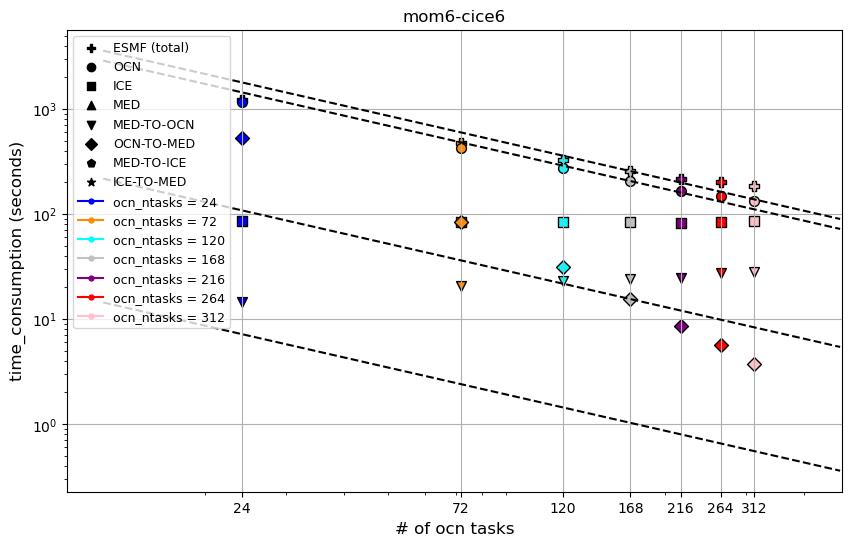

In [45]:
label_fontsize = 12
legend_fontsize = 9
nrows = 1
ncols = 1
figsize = (10, 6)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes = axes.flatten() if (nrows * ncols > 1) else [axes]

colors = ['r', 'b', 'g', 'darkorange', 'pink', 'cyan', 'lime', 'silver', 'gold', 'purple', 'grey', 'r', 'g', 'pink']

ocn_ntasks = [i['ocn_ntasks'] for i in task_values]
select_index = task_values_eff_indices
regions_index = [0,1,2,11,5,6,7,8]
update_regionNames = [regionNames[i] for i in regions_index]
regions_markers = ['P', 'o', 's', '^', 'v', 'D', 'p', '*']
regions_legend = [
    "ESMF (total)",
    "OCN",
    "ICE",
    "MED",
    "MED-TO-OCN",
    "OCN-TO-MED",
    "MED-TO-ICE",
    "ICE-TO-MED",
]
focus_regions = [0,1,2,5,6]
key_x = 'ocn_ntasks'
x_range = [10, 484]
start_index = 3
incre=12
for i in select_index:
    print(i)
    color = colors[i]
    plot_x_values = task_values[i][key_x]
    region_marker_pairs = zip(regions_index, regions_markers)
    try:
        for region_indx, marker in region_marker_pairs:
            if region_indx in focus_regions:
                axes[0].scatter(plot_x_values, runtime_tot[i][regionNames[region_indx]], marker=marker,
                            facecolors=color, edgecolors='k', s=50)
            else:
                pass
        if i == select_index[0]:
            region_index = 0
            ix, iy = ideal_points_based_on_dataset(task_values,select_index,start_index,key_x,update_regionNames, region_index,x_range,incre=incre)
            axes[0].plot(ix, iy, '--', color='black')
            region_index = 1
            ix, iy = ideal_points_based_on_dataset(task_values,select_index,start_index,key_x,update_regionNames, region_index,x_range,incre=incre)
            axes[0].plot(ix, iy, '--', color='black')
            region_index = 5
            ix, iy = ideal_points_based_on_dataset(task_values,select_index,start_index,key_x,update_regionNames, region_index,x_range,incre=incre)
            axes[0].plot(ix, iy, '--', color='black')
            region_index = 6
            ix, iy = ideal_points_based_on_dataset(task_values,select_index,start_index,key_x,update_regionNames, region_index,x_range,incre=incre)
            axes[0].plot(ix, iy, '--', color='black')
            
    except KeyError:
        pass

black_marker_legend = []
for i in range(len(regions_index)):
    black_marker_legend_tmp = plt.scatter([0], [0], marker=regions_markers[i], facecolors='k', edgecolors='k', label=f"{regions_legend[i]}")
    black_marker_legend.append(black_marker_legend_tmp)

cpl_legend = []
for i in select_index:
    cpl_legend_tmp = plt.Line2D([0], [0], marker='.', color=f'{colors[i]}', label=f"ocn_ntasks = {ocn_ntasks[i]}", markersize=7)
    cpl_legend.append(cpl_legend_tmp)

title = 'mom6-cice6'
axes[0].legend(handles=black_marker_legend + cpl_legend, loc='upper left', fontsize=legend_fontsize)


xlims = x_range
axes[0].set_xlim(xlims)
axes[0].grid(True)
axes[0].set_title(title, fontsize=label_fontsize)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
xticks = [ocn_ntasks[i] for i in task_values_eff_indices]
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticks)
# axes[0].xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))  # Major ticks
# axes[0].xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))  # Minor ticks
axes[0].set_xlabel('# of ocn tasks', fontsize=label_fontsize)
axes[0].set_ylabel('time_consumption (seconds)', fontsize=label_fontsize)
# axes[0].yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))  # Major ticks for y-axis
# axes[0].yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))  # Minor ticks for y-axis

plt.show()

Text(0.5, 1.0, 'total # 1440')

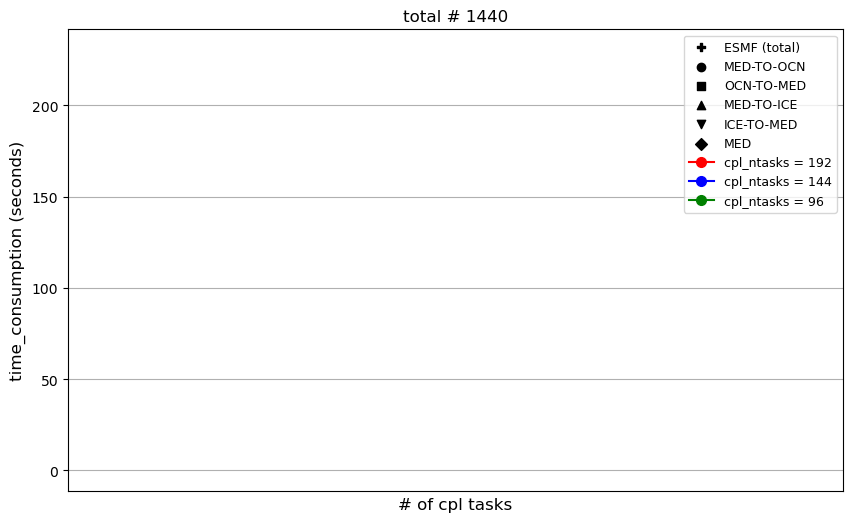

In [16]:
label_fontsize = 12
legend_fontsize = 9
nrows = 1
ncols = 1
figsize = (10, 6)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes = axes.flatten() if (nrows * ncols > 1) else [axes]

# Define colors for different datasets (cpl_ntasks)
colors = ['red', 'blue', 'green']
# Define markers for different variables (ESMF, MED-TO-OCN, etc.)
markers = ['P', 'o', 's', '^', 'v', 'D']
select_index = [-1, -2, -3]
cpl_ntasks = [task_values[i]['cpl_ntasks'] for i in select_index]

for j_index, i in enumerate(select_index):
    color = colors[j_index]

    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[0]], marker=markers[0],
                    facecolors=color, edgecolors='k', s=50)  # ESMF
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[5]], marker=markers[1],
                    facecolors=color, edgecolors='k')  # MED-TO-OCN
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[6]], marker=markers[2],
                    facecolors=color, edgecolors='k')  # OCN-TO-MED
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[7]], marker=markers[3],
                    facecolors=color, edgecolors='k')  # MED-TO-ICE
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[8]], marker=markers[4],
                    facecolors=color, edgecolors='k')  # ICE-TO-MED
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[11]], marker=markers[5],
                    facecolors=color, edgecolors='k')  # MED

black_marker_legend = [
    plt.scatter([0], [0], marker=markers[0], facecolors='k', edgecolors='k', label="ESMF (total)"),
    plt.scatter([0], [0], marker=markers[1], facecolors='k', edgecolors='k', label="MED-TO-OCN"),
    plt.scatter([0], [0], marker=markers[2], facecolors='k', edgecolors='k', label="OCN-TO-MED"),
    plt.scatter([0], [0], marker=markers[3], facecolors='k', edgecolors='k', label="MED-TO-ICE"),
    plt.scatter([0], [0], marker=markers[4], facecolors='k', edgecolors='k', label="ICE-TO-MED"),
    plt.scatter([0], [0], marker=markers[5], facecolors='k', edgecolors='k', label="MED")
]

cpl_legend = [
    plt.Line2D([0], [0], marker='o', color='red', label="cpl_ntasks = 192", markersize=7),
    plt.Line2D([0], [0], marker='o', color='blue', label="cpl_ntasks = 144", markersize=7),
    plt.Line2D([0], [0], marker='o', color='green', label="cpl_ntasks = 96", markersize=7)
]
title = 'total # 1440'
axes[0].legend(handles=black_marker_legend + cpl_legend, loc='upper right', fontsize=legend_fontsize)

axes[0].set_xticks(cpl_ntasks)
axes[0].set_xlabel('# of cpl tasks', fontsize=label_fontsize)
axes[0].set_ylabel('time_consumption (seconds)', fontsize=label_fontsize)
xlims = [36, 288]
axes[0].set_xlim(xlims)
axes[0].grid(True)
axes[0].set_title(title, fontsize=label_fontsize)

In [71]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.max_colwidth', None)

In [80]:
def profiling_test_select_cores(tot:list,
                 ratio_m2i_start:int = 3,
                 ratio_m2i_max:int = 20,
                 cores_ice_min_start:int = 1000,
                 cores_ice_min_threshold:int = 48,
                 cores_ice_max_threshold:int = 456,
                 cores_ocn_max_threshold:int = 2688):

    cores_ice_total = []
    cores_mom_total = []
    cores_tot_total = []

    """
    Selects cores based on given thresholds and ratios.

    Parameters:
    tot (list): A list of total cores.
    ratio_m2i_start (int): Initial ratio of ocn to ice cores. Default is 3.
    cores_ice_min_start (int): Initial minimum ice cores. Default is 1000. 
    cores_ice_min_threshold (int): Minimum threshold for ice cores.
    cores_ice_max_threshold (int): Maximum threshold for ice cores.
    cores_ocn_max_threshold (int): Maximum threshold for ocn cores.

    Returns:
    list: A list of selected cores.
    """
    count = 0
    ratio_tot = []
    for i in range(len(tot)):
        ratio_m2i_min = ratio_m2i_start
        cores_ice_min = cores_ice_min_start
        while cores_ice_min >= cores_ice_min_threshold:
            cores_ice_min = tot[i] / (ratio_m2i_min + 1)
            #print(ratio_m2i_min)
            if cores_ice_min < cores_ice_min_threshold or cores_ice_min > cores_ice_max_threshold or ratio_m2i_min >ratio_m2i_max:
                # Set a flag to indicate that one of the conditions is met
                ratio_m2i_min += 1
                continue
                
            if cores_ice_min % 1 == 0:  # Check cores_ice_min is integer and no conditions are met
                #if cores_ice_min % 24 == 0:  # check cores_ice_min is 24x
                cores_ice_min = int(cores_ice_min)
                cores_mom_min = tot[i] - cores_ice_min
                if cores_mom_min > cores_ocn_max_threshold:
                    ratio_m2i_min += 1
                    continue
                cores_tot_min = cores_ice_min+cores_mom_min

                cores_tot_total.append(cores_tot_min)
                cores_ice_total.append(cores_ice_min)
                cores_mom_total.append(cores_mom_min)
                ratio_tot.append(ratio_m2i_min)
                count += 1
                # print(f'ratio_m2i_min: {ratio_m2i_min}')
                # print(cores_mom_min, cores_ice_min)

            ratio_m2i_min += 1
            
    # pprint(f'total acting cores: {cores_tot_total}')
    # pprint(f'total ICE cores: {cores_ice_total}')
    # pprint(f'total MOM cores: {cores_mom_total}')
    # pprint(f'ratio of MOM to ICE: {ratio_tot}')
    pprint(f'total count of runs: {count}')
    pprint(f'input total cores: {tot}')
    # for i in range(len(cores_tot_total)):
    #     pprint(f'{cores_tot_total[i]}, {cores_ice_total[i]}, {cores_mom_total[i]}')
    df = pd.DataFrame({
    'Total Cores': cores_tot_total,
    'ICE Cores': cores_ice_total,
    'MOM Cores': cores_mom_total,
    'ratio of MOM to ICE': ratio_tot,
    })

    return cores_tot_total,cores_ice_total,cores_mom_total,ratio_tot,count, df

In [49]:
tot = [48*i for i in range(1,15)]
tot

[48, 96, 144, 192, 240, 288, 336, 384, 432, 480, 528, 576, 624, 672]

In [81]:
ncpus_tot,ncpus_ice,ncpus_mom,ratio_tot,count,df = profiling_test_select_cores(tot = tot,
                 ratio_m2i_start = 1,
                 ratio_m2i_max = 20,
                 cores_ice_min_start = 1e9,  # set a high value
                 cores_ice_min_threshold = 24,
                 cores_ice_max_threshold = 288,
                 cores_ocn_max_threshold = 864)

'total count of runs: 95'
('input total cores: [48, 96, 144, 192, 240, 288, 336, 384, 432, 480, 528, '
 '576, 624, 672]')


In [82]:
df

,Total Cores,ICE Cores,MOM Cores,ratio of MOM to ICE
0,48,24,24,1
1,96,48,48,1
2,96,32,64,2
3,96,24,72,3
4,144,72,72,1
5,144,48,96,2
6,144,36,108,3
7,144,24,120,5
8,192,96,96,1
9,192,64,128,2
